#                                  Multi Class Clasification - 1D

# Load Data

In [1]:
import pandas as pd
import os

In [2]:

file_name = "diabetes_dataset"
root_folder = f'multi-class-clasification/one-d/{file_name}/' 
os.makedirs(root_folder, exist_ok=True)

df = pd.read_csv('sample_data/'+file_name+'.csv')

#buang kolom tidak dibutuhkan
df.drop(columns=['diagnosed_diabetes'], inplace=True)

print("Sebulum DROP nan : " + str(df.shape) )
df = df.dropna() #Drop Nan
print("Setelah DROP nan : " + str(df.shape) )

#gabungkan data karena data kurang banyak
# gestational -> Type 2
df["diabetes_stage"] = df["diabetes_stage"].str.replace(
    r"(?i)gestational", "Type 2", regex=True
)
# Tipe 1 -> Type 2
df["diabetes_stage"] = df["diabetes_stage"].str.replace(
    r"(?i)Type 1", "Type 2", regex=True
)

Sebulum DROP nan : (100000, 30)
Setelah DROP nan : (100000, 30)


In [3]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,239,41,160,145,136,236,6.36,8.18,29.6,Type 2
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,213,66,99,36,118,195,5.07,7.51,44.7,Type 2
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,171,50,79,140,139,253,5.28,9.03,38.2,Type 2
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,210,52,125,160,137,184,12.74,7.20,23.5,Type 2


#### LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#labeling
df['label_gender']            = le.fit_transform(df['gender'])
df['label_ethnicity']         = le.fit_transform(df['ethnicity'])
df['label_income_level']      = le.fit_transform(df['income_level'])
df['label_education_level']   = le.fit_transform(df['education_level'])
df['label_employment_status'] = le.fit_transform(df['employment_status'])
df['label_smoking_status']    = le.fit_transform(df['smoking_status'])

#label target
# Konversi ke kategori otomatis
df["diabetes_stage"] = df["diabetes_stage"].astype("category")

# Buat kolom label otomatis (0,1,2,3,...)
df["label_diabetes_stage"] = df["diabetes_stage"].cat.codes

labels = dict(enumerate(df["diabetes_stage"].cat.categories))
print(labels)


{0: 'No Diabetes', 1: 'Pre-Diabetes', 2: 'Type 2'}


In [5]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hba1c,diabetes_risk_score,diabetes_stage,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status,label_diabetes_stage
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,8.18,29.6,Type 2,1,0,2,1,0,2,2
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,5.63,23.0,No Diabetes,0,4,3,1,0,1,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,7.51,44.7,Type 2,1,2,3,1,3,2,2
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,9.03,38.2,Type 2,0,1,1,1,1,2,2
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,7.20,23.5,Type 2,1,4,3,0,1,2,2


#### Scaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Contoh: buat dan fit scaler
scaler = MinMaxScaler()
cols = [
    'label_gender', 
    'label_ethnicity', 
    'label_income_level',
    'label_education_level',
    'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score'
]

# Dictionary untuk menyimpan hasil transformasi
scaled_data = {}

# Loop untuk setiap kolom
for col in cols:
    scaler = MinMaxScaler()
    df[[col]] = scaler.fit_transform(df[[col]])  # scaling per kolom
    joblib.dump(scaler, os.path.join(root_folder, f'scaler_{col}.pkl'))
    scaled_data[col] = scaler
    print(f"✅ Scaler for '{col}' saved as scaler_{col}.pkl")

print("\nAll individual scalers saved successfully!")

✅ Scaler for 'label_gender' saved as scaler_label_gender.pkl
✅ Scaler for 'label_ethnicity' saved as scaler_label_ethnicity.pkl
✅ Scaler for 'label_income_level' saved as scaler_label_income_level.pkl
✅ Scaler for 'label_education_level' saved as scaler_label_education_level.pkl
✅ Scaler for 'label_employment_status' saved as scaler_label_employment_status.pkl
✅ Scaler for 'label_smoking_status' saved as scaler_label_smoking_status.pkl
✅ Scaler for 'age' saved as scaler_age.pkl
✅ Scaler for 'physical_activity_minutes_per_week' saved as scaler_physical_activity_minutes_per_week.pkl
✅ Scaler for 'diet_score' saved as scaler_diet_score.pkl
✅ Scaler for 'sleep_hours_per_day' saved as scaler_sleep_hours_per_day.pkl
✅ Scaler for 'glucose_postprandial' saved as scaler_glucose_postprandial.pkl
✅ Scaler for 'insulin_level' saved as scaler_insulin_level.pkl
✅ Scaler for 'hba1c' saved as scaler_hba1c.pkl
✅ Scaler for 'diabetes_risk_score' saved as scaler_diabetes_risk_score.pkl

All individual sc

In [7]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hba1c,diabetes_risk_score,diabetes_stage,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status,label_diabetes_stage
0,0.555556,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,0.258103,0.57,...,0.720690,0.417054,Type 2,0.5,0.00,0.50,0.333333,0.000000,1.0,2
1,0.416667,Female,White,Highschool,Middle,Employed,Former,1,0.171669,0.67,...,0.281034,0.314729,No Diabetes,0.0,1.00,0.75,0.333333,0.000000,0.5,0
2,0.583333,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,0.068427,0.64,...,0.605172,0.651163,Type 2,0.5,0.50,0.75,0.333333,1.000000,1.0,2
3,0.777778,Female,Black,Highschool,Low,Retired,Never,0,0.058824,0.34,...,0.867241,0.550388,Type 2,0.0,0.25,0.25,0.333333,0.333333,1.0,2
4,0.388889,Male,White,Graduate,Middle,Retired,Never,1,0.130852,0.72,...,0.551724,0.322481,Type 2,0.5,1.00,0.75,0.000000,0.333333,1.0,2


#### Mapping label

In [8]:
import json
mapping_dicts = {}

cols = [
    'gender',
    'ethnicity',
    'education_level',
    'income_level',
    'employment_status',
    'smoking_status'
]

for col in cols:
    label_col = f"label_{col}"
    mapping_dicts[col] = dict(zip(df[col], df[label_col]))


with open(root_folder + 'label_mappings.json', 'w') as f:
    json.dump(mapping_dicts, f, indent=2)

rows = []
for col, mapping in mapping_dicts.items():
    for k, v in mapping.items():
        rows.append({'feature': col, 'original_value': k, 'label_value': v})

mapping_table = pd.DataFrame(rows)
mapping_table

,feature,original_value,label_value
0,gender,Male,0.500000
1,gender,Female,0.000000
2,gender,Other,1.000000
3,ethnicity,Asian,0.000000
4,ethnicity,White,1.000000
5,ethnicity,Hispanic,0.500000
6,ethnicity,Black,0.250000
7,ethnicity,Other,0.750000
8,education_level,Highschool,0.333333
9,education_level,Graduate,0.000000


#### Select Kolom To Trian

In [9]:
col_target = 'label_diabetes_stage'
cols = [
    'label_gender', 
    'label_ethnicity', 
    'label_income_level',
    'label_education_level',
    'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score',
    #------------------------
    col_target
]
df = df[cols].copy()

In [10]:
df.head()

,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,label_diabetes_stage
0,0.5,0.00,0.50,0.333333,0.000000,1.0,0.555556,0.258103,0.57,0.700000,0.764977,0.144275,0.720690,0.417054,2
1,0.0,1.00,0.75,0.333333,0.000000,0.5,0.416667,0.171669,0.67,0.500000,0.368664,0.000000,0.281034,0.314729,0
2,0.5,0.50,0.75,0.333333,1.000000,1.0,0.583333,0.068427,0.64,1.000000,0.576037,0.101588,0.605172,0.651163,2
3,0.0,0.25,0.25,0.333333,0.333333,1.0,0.777778,0.058824,0.34,0.514286,0.843318,0.108537,0.867241,0.550388,2
4,0.5,1.00,0.75,0.000000,0.333333,1.0,0.388889,0.130852,0.72,0.628571,0.525346,0.355394,0.551724,0.322481,2


#### cek keseimbangan data

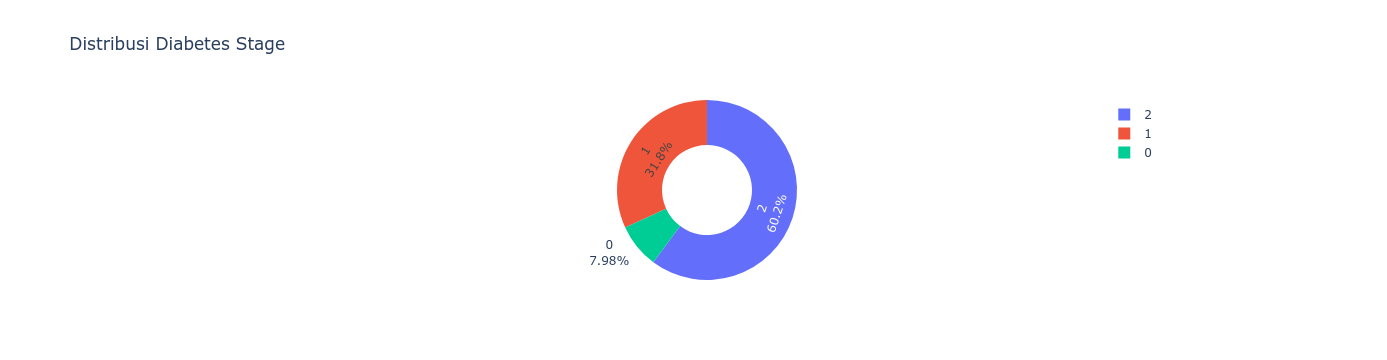

In [11]:
import plotly.express as px

fig = px.pie(
    df,
    names=col_target,
    hole=0.5,  # membuatnya jadi donat
    title='Distribusi Diabetes Stage',
)
fig.update_traces(textinfo='percent+label')
fig.show()

# Data Load To Train

#### select Future to traian

In [12]:
feature_cols = [
        'label_gender', 
        #'label_ethnicity', 
        #'label_income_level',
        #'label_education_level',
        #'label_employment_status', 
        #'label_smoking_status',
        #--------------------------
        'age',
        'physical_activity_minutes_per_week',
        #'diet_score',
        #'sleep_hours_per_day',
        'glucose_postprandial',
        'insulin_level',
        'hba1c',
        #'diabetes_risk_score',
    ]
target_cols  = col_target

#### Split data

In [13]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Misal df sudah berisi semua data
# Pisahkan fitur dan target
feature_cols = feature_cols
target_cols = target_cols

# Pisahkan train-test (stratify opsional jika masih punya kolom 'diabetes_stage')
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)


#### DataLoader

In [14]:
from data_set import MultiClass1DDataset

# Buat dataset dengan class kamu
train_dataset = MultiClass1DDataset(X_train, feature_cols, target_cols, normalize=False)
test_dataset  = MultiClass1DDataset(X_test, feature_cols, target_cols, normalize=False)

# Buat DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Cek contoh batch
for X, y in train_loader:
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    print(X[:3])  # contoh fitur
    print(y[:3])  # contoh label
    break

X shape: torch.Size([32, 6])
y shape: torch.Size([32])
tensor([[0.5000, 0.3611, 0.2113, 0.4793, 0.2214, 0.4121],
        [0.0000, 0.4028, 0.0504, 0.4470, 0.4090, 0.5207],
        [0.0000, 1.0000, 0.0516, 0.6083, 0.0950, 0.6069]])
tensor([1, 2, 2])


# Config

In [15]:
from jcopdl.callback import Callback, set_config
config = set_config({
    "labels"         : labels,
    "input_dim"      : len(test_dataset.X[0]),
    "hidden_dims"    : [ 32],
    "output_dim"     : len(labels),
    "dropout"        : 0.1,
    "activation"     : "relu",
    "early_stop_patience" : 5,
    "col_target"     : col_target,
    "feature_cols"   : feature_cols
})
config

Config(activation=relu, col_target=label_diabetes_stage, dropout=0.1, early_stop_patience=5, feature_cols=['label_gender', 'age', 'physical_activity_minutes_per_week', 'glucose_postprandial', 'insulin_level', 'hba1c'], hidden_dims=[32], input_dim=6, labels={0: 'No Diabetes', 1: 'Pre-Diabetes', 2: 'Type 2'}, output_dim=3)

# MCOC

#### Model - Criterion - Optimizer - Callback

In [16]:
from class_lib import Model1DPure
from torch import optim, nn
from jcopdl.callback import Callback

#Model
model = Model1DPure(input_dim=config.input_dim, hidden_dims=config.hidden_dims, output_dim=config.output_dim, dropout=config.dropout, activation=config.activation).to(device)

#Criterion
criterion = nn.CrossEntropyLoss()

#Optimizer
optim = optim.AdamW(model.parameters(), lr=0.001)

#Callback
callback = Callback(model, config, outdir=root_folder,early_stop_patience=config.early_stop_patience)

#### Visualisasi Model

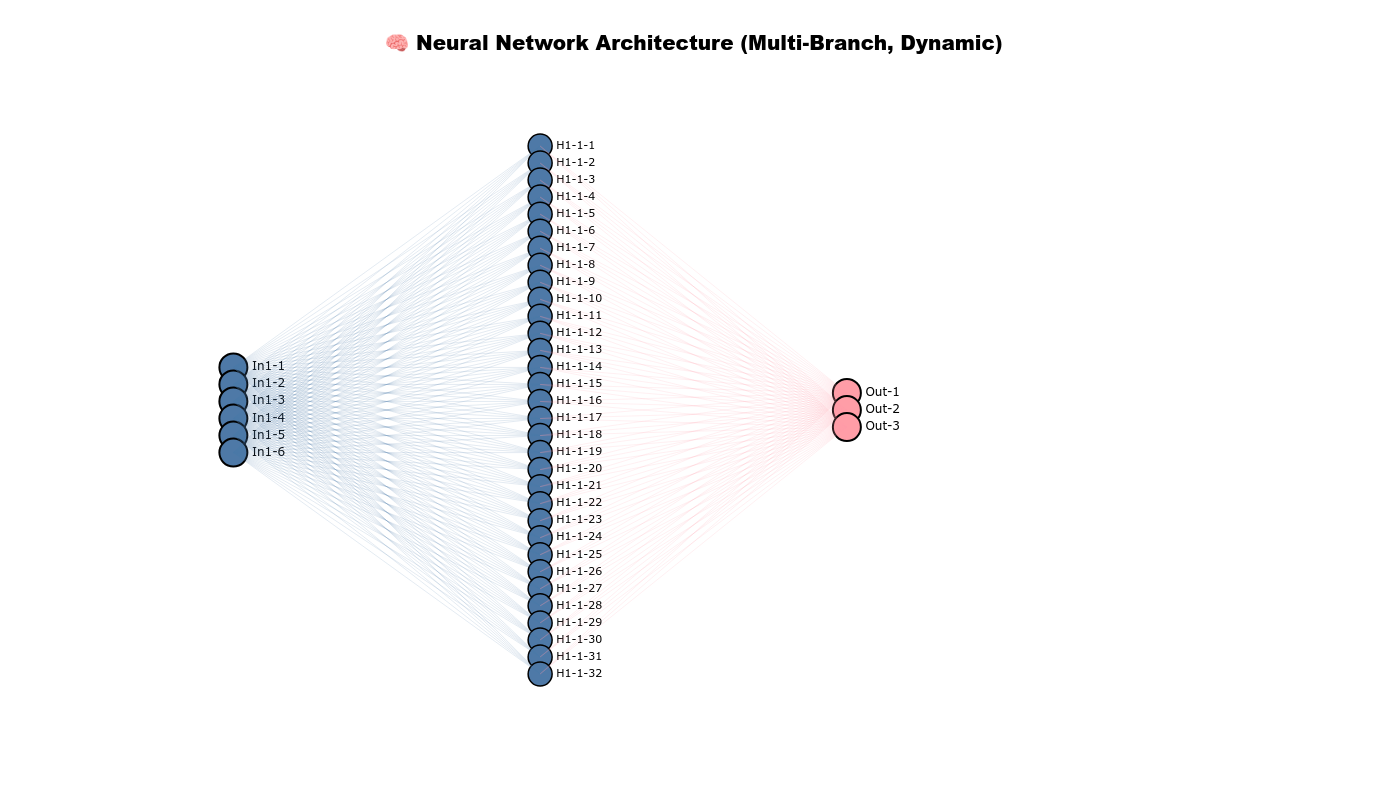

In [17]:
from visualization import plot_dynamic_multi_input_network
plot_dynamic_multi_input_network(
    input_dims=[config.input_dim],
    hidden_dims_per_branch=[
        config.hidden_dims
    ],
    combined_dims=None,
    output_dim=config.output_dim,
    figsize=(1000, 800)
)


# Training


─────────────────────────────────────────────────── 🚀 EPOCH 1 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3760.45it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.5705 │ 0.4695 │ │ No Diabetes  │  0.3703  │
│ Accuracy │ 0.7292 │ 0.7944 │ │ Pre-Diabetes │  0.7342  │
│ Macro F1 │ 0.5515 │ 0.6868 │ │    Type 2    │  0.8824  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

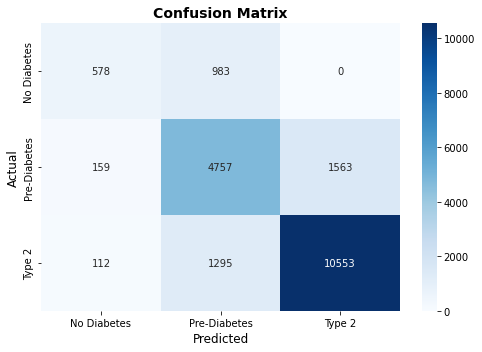


Epoch     1
Train_cost  = 0.5705 | Test_cost  = 0.4695 | Train_score = 0.7292 | Test_score = 0.7944 |


─────────────────────────────────────────────────── 🚀 EPOCH 2 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3310.57it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.4493 │ 0.4198 │ │ No Diabetes  │  0.5343  │
│ Accuracy │ 0.8063 │ 0.8224 │ │ Pre-Diabetes │  0.8193  │
│ Macro F1 │ 0.7103 │ 0.7440 │ │    Type 2    │  0.8617  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

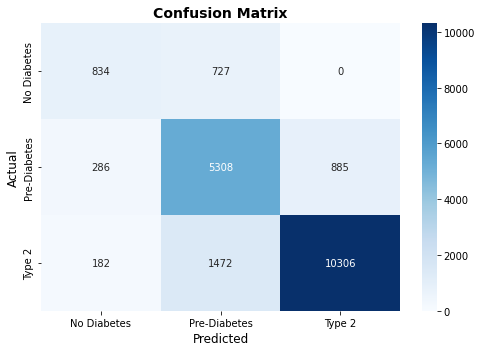


Epoch     2
Train_cost  = 0.4493 | Test_cost  = 0.4198 | Train_score = 0.8063 | Test_score = 0.8224 |


─────────────────────────────────────────────────── 🚀 EPOCH 3 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3802.53it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.4062 │ 0.3860 │ │ No Diabetes  │  0.6099  │
│ Accuracy │ 0.8268 │ 0.8364 │ │ Pre-Diabetes │  0.8583  │
│ Macro F1 │ 0.7456 │ 0.7667 │ │    Type 2    │  0.8541  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

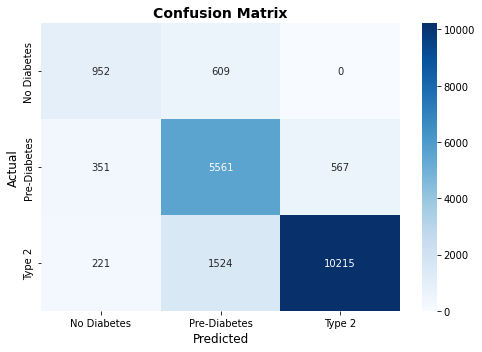


Epoch     3
Train_cost  = 0.4062 | Test_cost  = 0.3860 | Train_score = 0.8268 | Test_score = 0.8364 |


─────────────────────────────────────────────────── 🚀 EPOCH 4 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3740.16it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3802 │ 0.3686 │ │ No Diabetes  │  0.6233  │
│ Accuracy │ 0.8367 │ 0.8377 │ │ Pre-Diabetes │  0.8509  │
│ Macro F1 │ 0.7628 │ 0.7699 │ │    Type 2    │  0.8584  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

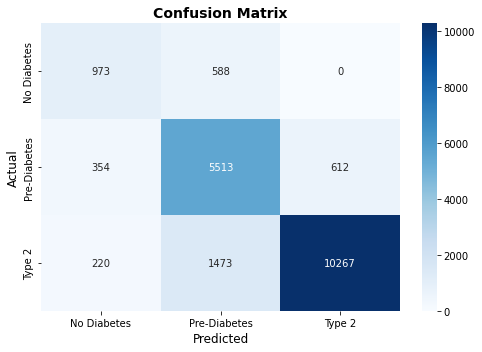


Epoch     4
Train_cost  = 0.3802 | Test_cost  = 0.3686 | Train_score = 0.8367 | Test_score = 0.8377 |


─────────────────────────────────────────────────── 🚀 EPOCH 5 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3595.35it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3639 │ 0.3554 │ │ No Diabetes  │  0.6931  │
│ Accuracy │ 0.8441 │ 0.8466 │ │ Pre-Diabetes │  0.8694  │
│ Macro F1 │ 0.7751 │ 0.7836 │ │    Type 2    │  0.8542  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

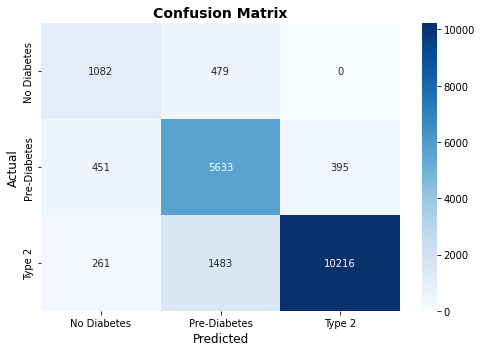


Epoch     5
Train_cost  = 0.3639 | Test_cost  = 0.3554 | Train_score = 0.8441 | Test_score = 0.8466 |


─────────────────────────────────────────────────── 🚀 EPOCH 6 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3622.67it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3535 │ 0.3491 │ │ No Diabetes  │  0.6425  │
│ Accuracy │ 0.8480 │ 0.8496 │ │ Pre-Diabetes │  0.8930  │
│ Macro F1 │ 0.7813 │ 0.7829 │ │    Type 2    │  0.8531  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

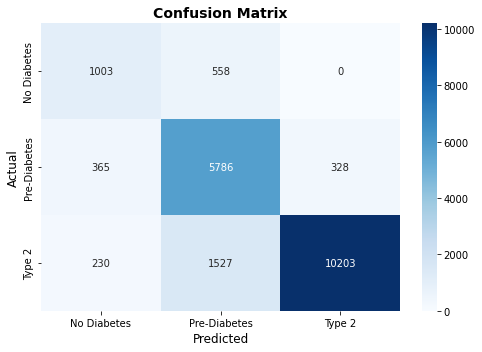


Epoch     6
Train_cost  = 0.3535 | Test_cost  = 0.3491 | Train_score = 0.8480 | Test_score = 0.8496 |


─────────────────────────────────────────────────── 🚀 EPOCH 7 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3671.47it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3474 │ 0.3458 │ │ No Diabetes  │  0.6803  │
│ Accuracy │ 0.8511 │ 0.8450 │ │ Pre-Diabetes │  0.8602  │
│ Macro F1 │ 0.7874 │ 0.7825 │ │    Type 2    │  0.8584  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

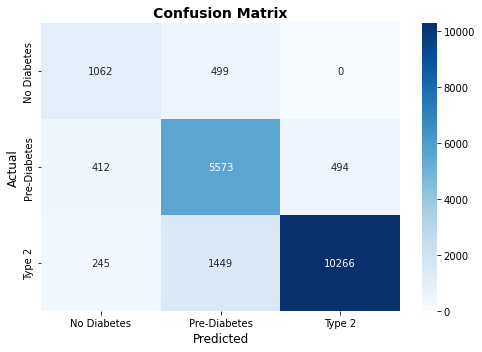


Epoch     7
Train_cost  = 0.3474 | Test_cost  = 0.3458 | Train_score = 0.8511 | Test_score = 0.8450 |
==> EarlyStop patience =  1 | Best test_score: 0.8496


─────────────────────────────────────────────────── 🚀 EPOCH 8 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3232.46it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3423 │ 0.3398 │ │ No Diabetes  │  0.7675  │
│ Accuracy │ 0.8535 │ 0.8518 │ │ Pre-Diabetes │  0.8665  │
│ Macro F1 │ 0.7910 │ 0.7950 │ │    Type 2    │  0.8549  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

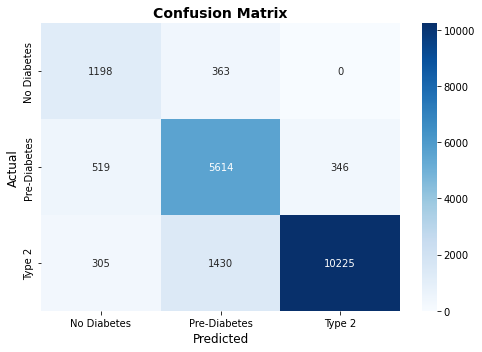


Epoch     8
Train_cost  = 0.3423 | Test_cost  = 0.3398 | Train_score = 0.8535 | Test_score = 0.8518 |


─────────────────────────────────────────────────── 🚀 EPOCH 9 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3369.77it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3384 │ 0.3367 │ │ No Diabetes  │  0.7431  │
│ Accuracy │ 0.8549 │ 0.8554 │ │ Pre-Diabetes │  0.8893  │
│ Macro F1 │ 0.7933 │ 0.7969 │ │    Type 2    │  0.8516  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

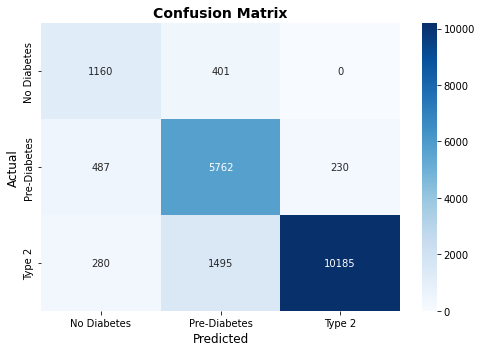


Epoch     9
Train_cost  = 0.3384 | Test_cost  = 0.3367 | Train_score = 0.8549 | Test_score = 0.8554 |


─────────────────────────────────────────────────── 🚀 EPOCH 10 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3194.01it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3367 │ 0.3377 │ │ No Diabetes  │  0.8283  │
│ Accuracy │ 0.8555 │ 0.8525 │ │ Pre-Diabetes │  0.8568  │
│ Macro F1 │ 0.7947 │ 0.7982 │ │    Type 2    │  0.8533  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

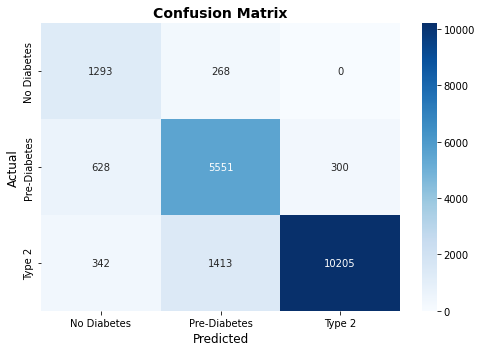


Epoch    10
Train_cost  = 0.3367 | Test_cost  = 0.3377 | Train_score = 0.8555 | Test_score = 0.8525 |
==> EarlyStop patience =  1 | Best test_score: 0.8554


─────────────────────────────────────────────────── 🚀 EPOCH 11 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3579.37it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3349 │ 0.3341 │ │ No Diabetes  │  0.7899  │
│ Accuracy │ 0.8561 │ 0.8601 │ │ Pre-Diabetes │  0.8963  │
│ Macro F1 │ 0.7961 │ 0.8035 │ │    Type 2    │  0.8497  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

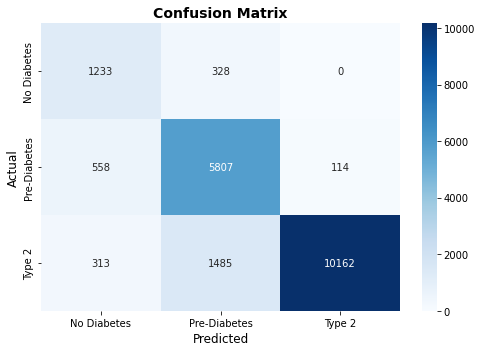


Epoch    11
Train_cost  = 0.3349 | Test_cost  = 0.3341 | Train_score = 0.8561 | Test_score = 0.8601 |


─────────────────────────────────────────────────── 🚀 EPOCH 12 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3716.26it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3331 │ 0.3353 │ │ No Diabetes  │  0.7489  │
│ Accuracy │ 0.8566 │ 0.8617 │ │ Pre-Diabetes │  0.9180  │
│ Macro F1 │ 0.7966 │ 0.8034 │ │    Type 2    │  0.8458  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

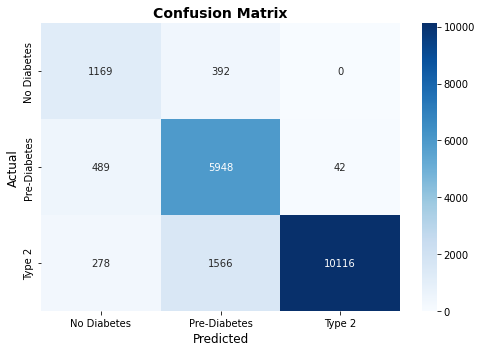


Epoch    12
Train_cost  = 0.3331 | Test_cost  = 0.3353 | Train_score = 0.8566 | Test_score = 0.8617 |


─────────────────────────────────────────────────── 🚀 EPOCH 13 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3715.31it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3325 │ 0.3317 │ │ No Diabetes  │  0.7380  │
│ Accuracy │ 0.8570 │ 0.8585 │ │ Pre-Diabetes │  0.9029  │
│ Macro F1 │ 0.7976 │ 0.7992 │ │    Type 2    │  0.8501  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

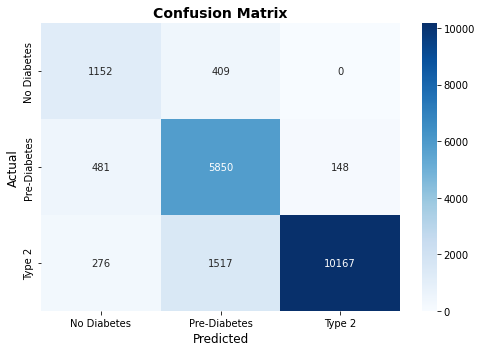


Epoch    13
Train_cost  = 0.3325 | Test_cost  = 0.3317 | Train_score = 0.8570 | Test_score = 0.8585 |
==> EarlyStop patience =  1 | Best test_score: 0.8617


─────────────────────────────────────────────────── 🚀 EPOCH 14 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3608.74it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3316 │ 0.3320 │ │ No Diabetes  │  0.8059  │
│ Accuracy │ 0.8576 │ 0.8605 │ │ Pre-Diabetes │  0.8941  │
│ Macro F1 │ 0.7986 │ 0.8045 │ │    Type 2    │  0.8494  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

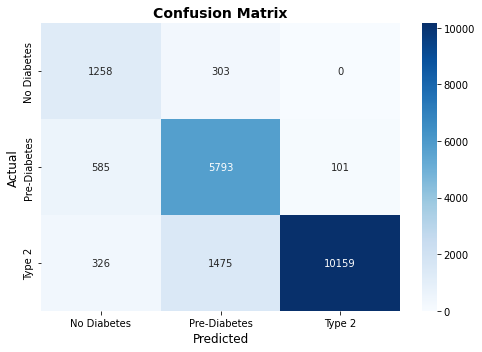


Epoch    14
Train_cost  = 0.3316 | Test_cost  = 0.3320 | Train_score = 0.8576 | Test_score = 0.8605 |
==> EarlyStop patience =  2 | Best test_score: 0.8617


─────────────────────────────────────────────────── 🚀 EPOCH 15 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3782.49it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3310 │ 0.3305 │ │ No Diabetes  │  0.7168  │
│ Accuracy │ 0.8576 │ 0.8587 │ │ Pre-Diabetes │  0.9086  │
│ Macro F1 │ 0.7993 │ 0.7982 │ │    Type 2    │  0.8502  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

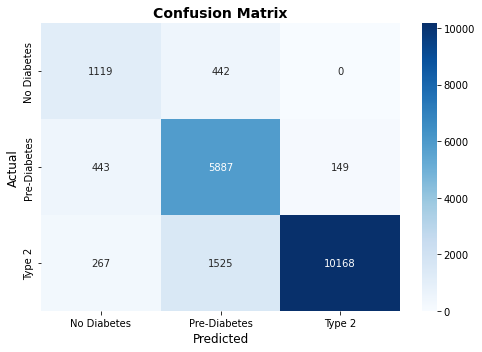


Epoch    15
Train_cost  = 0.3310 | Test_cost  = 0.3305 | Train_score = 0.8576 | Test_score = 0.8587 |
==> EarlyStop patience =  3 | Best test_score: 0.8617


─────────────────────────────────────────────────── 🚀 EPOCH 16 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3391.33it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3300 │ 0.3329 │ │ No Diabetes  │  0.7072  │
│ Accuracy │ 0.8581 │ 0.8621 │ │ Pre-Diabetes │  0.9271  │
│ Macro F1 │ 0.7995 │ 0.8006 │ │    Type 2    │  0.8472  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

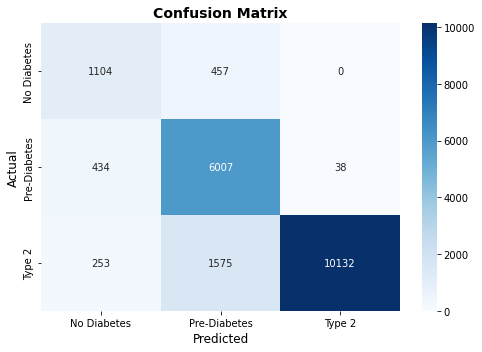


Epoch    16
Train_cost  = 0.3300 | Test_cost  = 0.3329 | Train_score = 0.8581 | Test_score = 0.8621 |


─────────────────────────────────────────────────── 🚀 EPOCH 17 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3705.70it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3300 │ 0.3328 │ │ No Diabetes  │  0.7502  │
│ Accuracy │ 0.8582 │ 0.8520 │ │ Pre-Diabetes │  0.8710  │
│ Macro F1 │ 0.7998 │ 0.7945 │ │    Type 2    │  0.8551  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

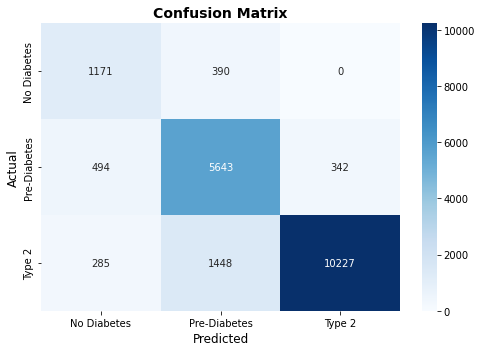


Epoch    17
Train_cost  = 0.3300 | Test_cost  = 0.3328 | Train_score = 0.8582 | Test_score = 0.8520 |
==> EarlyStop patience =  1 | Best test_score: 0.8621


─────────────────────────────────────────────────── 🚀 EPOCH 18 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3670.64it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3295 │ 0.3297 │ │ No Diabetes  │  0.7566  │
│ Accuracy │ 0.8580 │ 0.8597 │ │ Pre-Diabetes │  0.9038  │
│ Macro F1 │ 0.7998 │ 0.8017 │ │    Type 2    │  0.8492  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

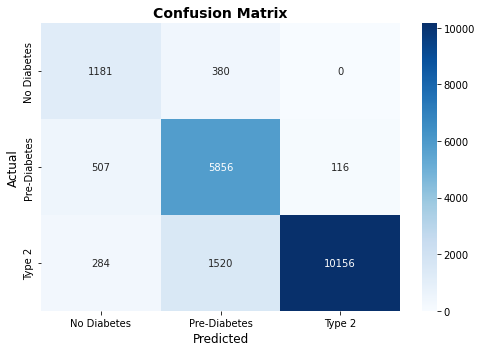


Epoch    18
Train_cost  = 0.3295 | Test_cost  = 0.3297 | Train_score = 0.8580 | Test_score = 0.8597 |
==> EarlyStop patience =  2 | Best test_score: 0.8621


─────────────────────────────────────────────────── 🚀 EPOCH 19 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3358.80it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3293 │ 0.3301 │ │ No Diabetes  │  0.7886  │
│ Accuracy │ 0.8582 │ 0.8611 │ │ Pre-Diabetes │  0.9025  │
│ Macro F1 │ 0.7997 │ 0.8044 │ │    Type 2    │  0.8482  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

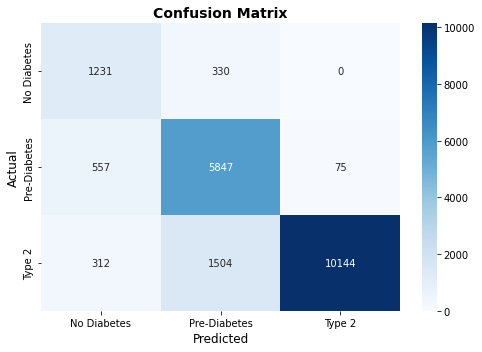


Epoch    19
Train_cost  = 0.3293 | Test_cost  = 0.3301 | Train_score = 0.8582 | Test_score = 0.8611 |
==> EarlyStop patience =  3 | Best test_score: 0.8621


─────────────────────────────────────────────────── 🚀 EPOCH 20 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3742.62it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3291 │ 0.3284 │ │ No Diabetes  │  0.7944  │
│ Accuracy │ 0.8583 │ 0.8571 │ │ Pre-Diabetes │  0.8839  │
│ Macro F1 │ 0.7996 │ 0.8014 │ │    Type 2    │  0.8508  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

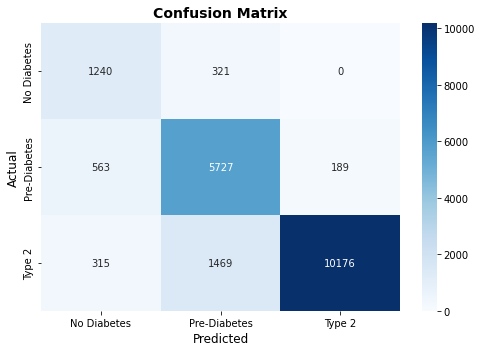


Epoch    20
Train_cost  = 0.3291 | Test_cost  = 0.3284 | Train_score = 0.8583 | Test_score = 0.8571 |


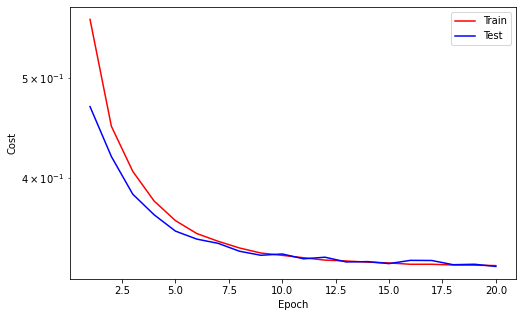

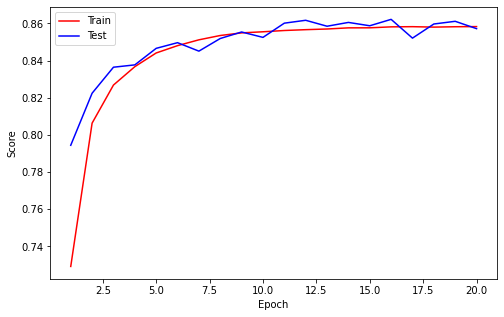

==> EarlyStop patience =  4 | Best test_score: 0.8621


─────────────────────────────────────────────────── 🚀 EPOCH 21 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 3732.05it/s]


           Summary                 Per-Class Accuracy     
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric   ┃  Train ┃   Test ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss     │ 0.3289 │ 0.3303 │ │ No Diabetes  │  0.6874  │
│ Accuracy │ 0.8587 │ 0.8533 │ │ Pre-Diabetes │  0.8940  │
│ Macro F1 │ 0.8005 │ 0.7912 │ │    Type 2    │  0.8529  │
└──────────┴────────┴────────┘ └──────────────┴──────────┘

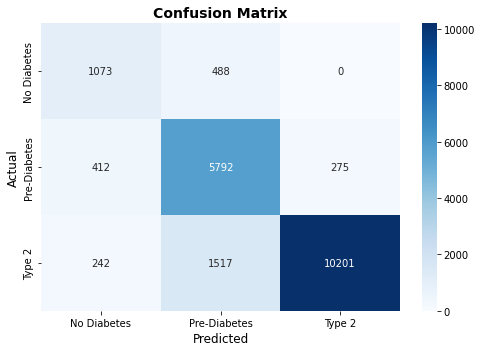


Epoch    21
Train_cost  = 0.3289 | Test_cost  = 0.3303 | Train_score = 0.8587 | Test_score = 0.8533 |
==> EarlyStop patience =  5 | Best test_score: 0.8621
==> Execute Early Stopping at epoch: 21 | Best test_score: 0.8621
==> Best model is saved at multi-class-clasification/one-d/diabetes_dataset/


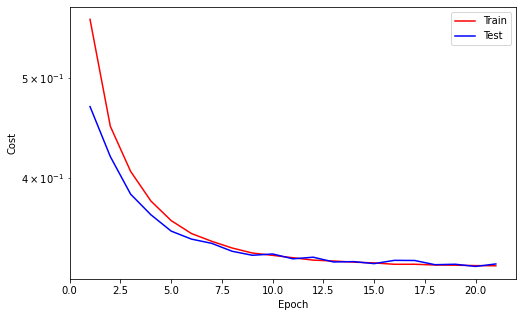

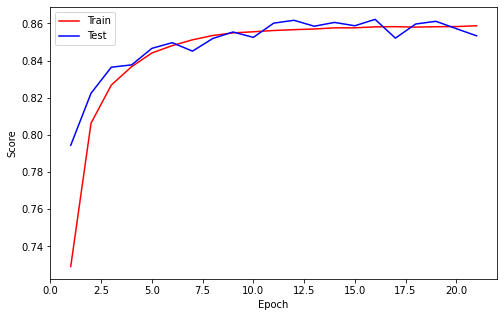

⏹️ Training dihentikan oleh early stopping.

In [18]:
from train_and_evaluate import train_and_evaluate_multi_class



train_and_evaluate_multi_class(
    model=model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optim=optim,
    config=config,
    device=device,
    labels=labels,          
    callback=callback
)

# Evaluate

      📊 Evaluasi Model           🎯 Per-Class Accuracy   
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metrik            ┃  Nilai ┃ ┃    Class     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ 💥 Loss (avg)     │ 0.3329 │ │ No Diabetes  │  0.7072  │
│ 🔹 Accuracy       │ 0.8621 │ │ Pre-Diabetes │  0.9271  │
│ 📈 Macro F1-score │ 0.8006 │ │    Type 2    │  0.8472  │
└───────────────────┴────────┘ └──────────────┴──────────┘

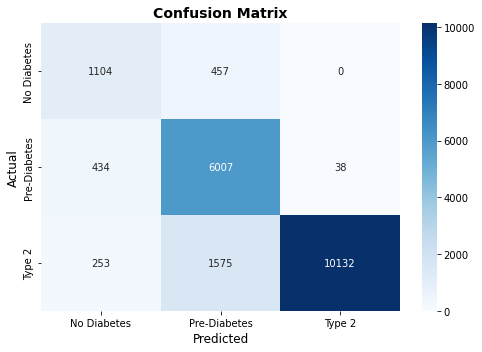

In [19]:
from evaluate import evaluate_multi_class



hsl = evaluate_multi_class(
    model=model,
    dataloader=test_loader,
    labels=labels,
    criterion=criterion,
    device=device,
    dimension='1d'
)

In [20]:
hsl['df'].head(200)

,Target,Prediksi,Benar,Benar (%)
0,No Diabetes,Pre-Diabetes,0,0
1,Type 2,Type 2,1,100
2,Pre-Diabetes,Pre-Diabetes,1,100
3,Pre-Diabetes,Pre-Diabetes,1,100
4,Type 2,Pre-Diabetes,0,0
...,...,...,...,...
195,Type 2,Type 2,1,100
196,Pre-Diabetes,Pre-Diabetes,1,100
197,Type 2,Type 2,1,100
198,Pre-Diabetes,Pre-Diabetes,1,100


# Pengaplikasian

In [21]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [22]:
import torch, json
from torch import optim, nn
from class_lib import MultiLabel1DClassifier
import joblib
import pandas as pd


# Load Config
config = torch.load(root_folder + "configs.pth", map_location="cpu", weights_only=False)
#config = torch.load(root_folder + "configs.pth", map_location="cpu")

#Load Weights
weights= torch.load(root_folder + "weights_best.pth", map_location="cpu")

#Load Label Mapping
with open(root_folder + "label_mappings.json", "r") as f:
    label_mapping = json.load(f)


model = MultiLabel1DClassifier(input_dim=config.input_dim, hidden_dims=config.hidden_dims, output_dim=config.output_dim, dropout=config.dropout, activation=config.activation)
model.load_state_dict(weights)
model.eval() 

MultiLabel1DClassifier(
  (model): Sequential(
    (0): Linear(in_features=6, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=32, out_features=3, bias=True)
    (4): Sigmoid()
  )
)

In [23]:
from aplokator import MultiLabelPredictor
predictor = MultiLabelPredictor(
    model=model,
    config=config,
    label_mapping=label_mapping,
    scaler_folder=root_folder,
)

HTML(value='\n        <style>\n        .minimal-container { background: #f8f9fa; padding: 12px; border-radius:…